In [9]:
!pip install plotly



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


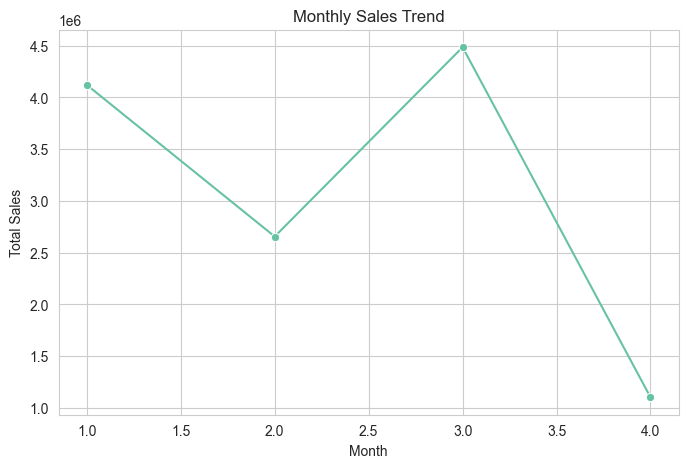

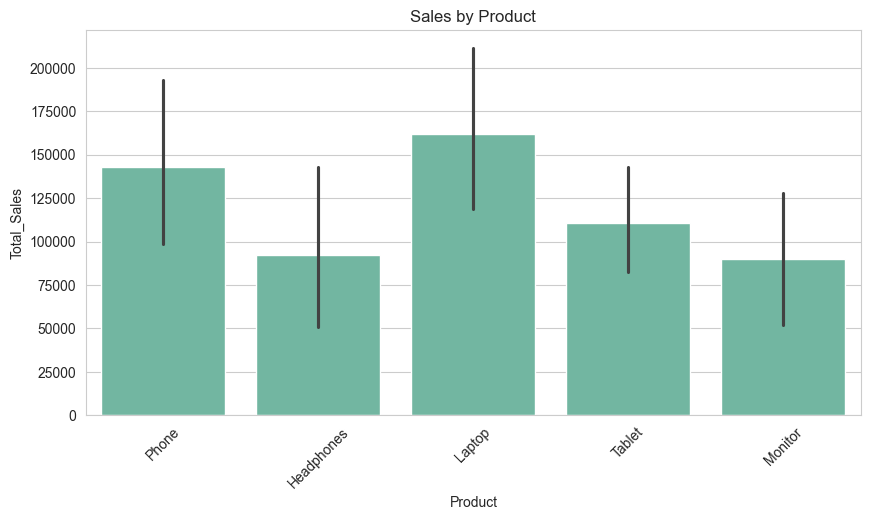

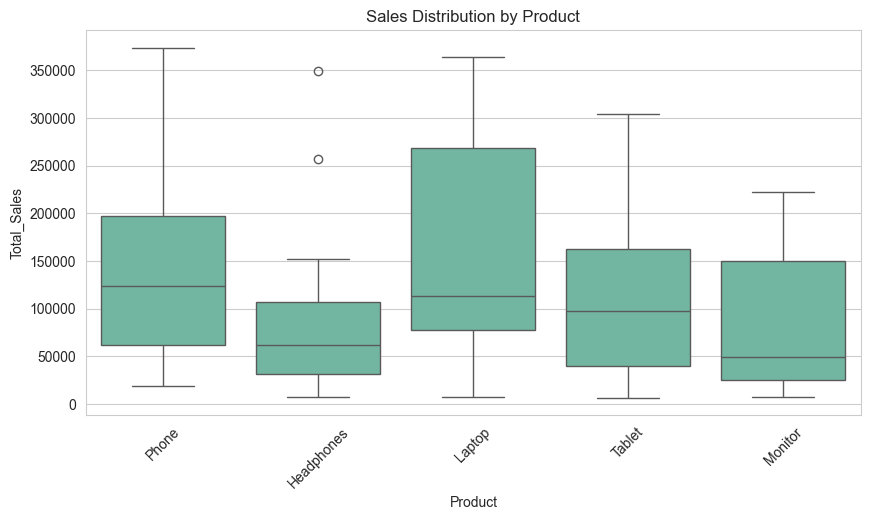

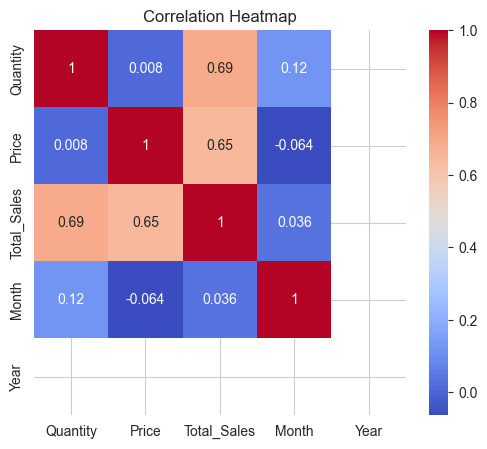

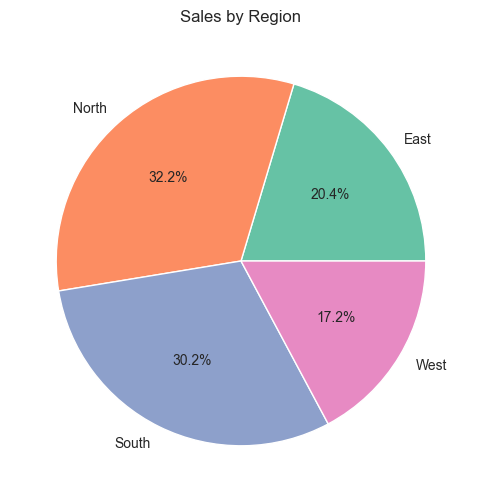

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_csv("sales_data (2).csv")

# Clean column names
df.columns = df.columns.str.strip()

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create Month & Year columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Set style
sns.set_style("whitegrid")
sns.set_palette("Set2")

# -------------------------------
# 1️⃣ Monthly Sales Trend
# -------------------------------
monthly_sales = df.groupby('Month')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Month', y='Total_Sales', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# -------------------------------
# 2️⃣ Sales by Product
# -------------------------------
plt.figure(figsize=(10,5))
sns.barplot(x='Product', y='Total_Sales', data=df)
plt.xticks(rotation=45)
plt.title("Sales by Product")
plt.show()

# -------------------------------
# 3️⃣ Sales Distribution by Product
# -------------------------------
plt.figure(figsize=(10,5))
sns.boxplot(x='Product', y='Total_Sales', data=df)
plt.xticks(rotation=45)
plt.title("Sales Distribution by Product")
plt.show()

# -------------------------------
# 4️⃣ Correlation Heatmap
# -------------------------------
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# 5️⃣ Sales by Region (Pie Chart)
# -------------------------------
region_sales = df.groupby('Region')['Total_Sales'].sum()

plt.figure(figsize=(6,6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title("Sales by Region")
plt.show()
